# Answers to Assignment 2

### **Assignment 2a**

In [1]:
!pip install ucamcl --upgrade
import ucamcl
GRADER = ucamcl.autograder('https://markmy.solutions', course='scicomp', section='assignment2a')

Waiting for you to log in .... done.


In [2]:
import math, random
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.optimize
# The next line is a piece of magic, to let plots appear in our Jupyter notebooks
%matplotlib inline    

**Question 1:**

In [3]:
def pairs(N):
    m = np.random.permutation(N)
    m1 = m[:(N)//2]
    m2 = m[(N)//2:]
    return m1,m2


In [4]:
q = GRADER.fetch_question('q1')
m1,m2 = pairs(q.n)
ans = {'n': len(np.unique(np.concatenate([m1,m2]))), 's': np.std(np.abs(m1-m2))}
GRADER.submit_answer(q, ans)

Correct!


(True, {'n': 15156, 's': 3570.879595065712})

**Question 2:**

In [5]:
def kinetic_exchange(v,w):
    sum = v+w
    R = np.random.random(len(v))
    vNew = R*sum
    wNew = (1-R)*sum
    return vNew,wNew

In [6]:
q = GRADER.fetch_question('q2')
v,w = np.linspace(1,5,q.n), np.linspace(1,2,q.n)**q.p
vnew,wnew = kinetic_exchange(v,w)
ans = {'m1': np.mean(vnew), 's2': np.std(wnew)}
GRADER.submit_answer(q, ans)

Correct!


(True, {'m1': 2.257830325990888, 's2': 1.5502422751367446})

**Question 3:**

In [7]:
def gini(w):
    N = len(w)
    w = sorted(w)
    num = np.sum((np.arange(N)+1)*w)
    den = N*np.sum(w)
    G = (2*num/den) - (1 + 1/N)
    return G

In [8]:
q = GRADER.fetch_question('q3')
w = np.linspace(0,1,q.n)**q.p
g = gini(w)
GRADER.submit_answer(q, {'g': g})

Correct!


(True, {'g': 0.3317255817998088})

**Question 4:**

In [9]:
def sim(N,T):
    pop = np.ones(N)
    gs = []
    for _ in range(T):
        m1,m2 = pairs(N)
        v = pop[m1]
        w = pop[m2]
        vNew,wNew = kinetic_exchange(v,w)
        newpop = np.zeros_like(pop)
        newpop[m1] = vNew
        newpop[m2] = wNew
        pop = newpop
        gs.append(gini(pop))
    return pop, gs

In [10]:
q = GRADER.fetch_question('q4')
w,gs = sim(q.n, q.t)
ans = {'gm': np.mean(gs[int(q.t/2):]), 'gs': np.std(gs[int(q.t/2):]), 'ws': np.std(w)}
GRADER.submit_answer(q, ans)

Correct!


(True,
 {'gm': 0.49463902304919266,
  'gs': 0.004187317507183,
  'ws': 0.9955255691930713})

**Question 5:**

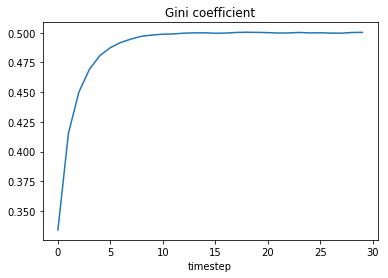

In [11]:
_,gs = sim(500000,30)
tstep = np.arange(30)
plt.plot(tstep, gs)
plt.xlabel('timestep')
plt.title('Gini coefficient')
plt.show()

### **Assignment 2b**

In [12]:
GRADER = ucamcl.autograder('https://markmy.solutions', course='scicomp', section='assignment2b')

Waiting for you to log in .. done.


**Question 6:**

In [13]:
q = GRADER.fetch_question('q6')
ans = 1 - (1/5) - ((2/5)*(1/5)+(3/5)*(2/5))
#P(move by > 1 quintile) = 1 - P(move by 0 quintiles) - P(move by 1 quintile)
#P(move by 0 quintiles) = 1/5 
#P(move by 1 quintile) = (2/5)*(1/5) {if initially in end quintiles (2 out of 5) - only 1 out of 5 quartiles to move to}  
                        #+ (3/5)*(2/5) {if in middle quartiles (3 out of 5) since 2 possible quartiles out of 5 to move to}
GRADER.submit_answer(q, ans)

Correct!


(True, 0.48)

**Question 7:**

In [14]:
def mobility(v,w):
    def quintile(x):
        quintiles = []
        for i in range(1,6):
            quintiles.append(np.percentile(x,20*i))
        return np.digitize(x,quintiles)
    quintchange = np.abs(quintile(v)-quintile(w))
    proportion = np.mean(quintchange>1)
    return proportion
    

In [15]:
# Submitting your answer:
q = GRADER.fetch_question('q7')
v,w = np.arange(q.n)**q.a, np.arange(q.n)**q.a * np.random.random(q.n)
GRADER.submit_answer(q, mobility(v,w))

Correct!


(True, 0.16059050064184852)

**Question 8:**

In [22]:
def simUntilStable(N):
    pop = np.ones(N)
    currentGS = 0

    gs = []
    while(True):
        m1,m2 = pairs(N)
        v = pop[m1]
        w = pop[m2]
        vNew,wNew = kinetic_exchange(v,w)
        newpop = np.zeros_like(pop)
        newpop[m1] = vNew
        newpop[m2] = wNew
        pop = newpop
        gs.append(gini(pop))
        if len(gs)>=2 and (abs(gs[-1]-gs[-2])<1e-2): #stable if Gini coefficient doesn't vary much
            break
    return pop

def simFurther(N,T,initpop):
    pop = initpop
    for _ in range(T):
        m1,m2 = pairs(N)
        v = pop[m1]
        w = pop[m2]
        vNew,wNew = kinetic_exchange(v,w)
        newpop = np.zeros_like(pop)
        newpop[m1] = vNew
        newpop[m2] = wNew
        pop = newpop
    return pop

In [23]:
q = GRADER.fetch_question('q8')
# For a population size q.n, measure mobility over q.t timesteps
w0 = simUntilStable(q.n)
v = simFurther(q.n,q.t,w0)
ans = mobility(v,w0)
GRADER.submit_answer(q, ans)

Correct!


(True, 0.47964249999999997)

**Question 9:**

In [24]:
def simQuintile(N,T):
    pop = np.ones(N)
    ems = []
    for i in range(T):
        m1,m2 = pairs(N)
        v = pop[m1]
        w = pop[m2]
        vNew,wNew = kinetic_exchange(v,w)
        newpop = np.zeros_like(pop)
        newpop[m1] = vNew
        newpop[m2] = wNew
        pop = newpop
        if i==0:
            initpop=pop
        ems.append(mobility(pop,initpop))
    return ems

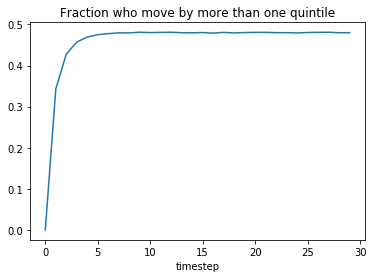

In [25]:
ems = simQuintile(500000,30)
tstep = np.arange(len(ems))
plt.plot(tstep, ems)
plt.xlabel('timestep')
plt.title('Fraction who move by more than one quintile')
plt.show()